In [3]:
import numpy as np 
import pandas as pd 
np.random.seed(42)  
import matplotlib.pyplot as plt  
%matplotlib inline 
import seaborn as sns 
color = sns.color_palette()
sns.set_style('darkgrid')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
df = pd.read_csv('./processed/merged_data_Y2.csv')
df_y3 = pd.read_csv('./processed/merged_data_Y3.csv')
df

,MemberID,AgeAtFirstClaim,Male,Female,Unknown,ClaimsCount,Unique_ProviderID,Unique_Vendor,Unique_PCP,PayDelay,...,3- 4 months,4- 5 months,5- 6 months,6- 7 months,7- 8 months,8- 9 months,9-10 months,DrugCount,LabCount,DaysInHospital
0,210,35.0,0.0,0.0,1.0,6.0,3.0,3.0,1.0,308.0,...,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
1,3197,5.0,0.0,1.0,0.0,5.0,4.0,3.0,1.0,148.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0
2,11951,15.0,0.0,1.0,0.0,11.0,8.0,8.0,1.0,608.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1
3,14661,5.0,0.0,0.0,1.0,12.0,4.0,4.0,1.0,637.0,...,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,5.0,0
4,14778,35.0,0.0,1.0,0.0,8.0,6.0,5.0,2.0,320.0,...,5.0,0.0,0.0,1.0,0.0,0.0,0.0,13.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51961,99971678,65.0,0.0,1.0,0.0,16.0,5.0,4.0,1.0,553.0,...,3.0,1.0,0.0,0.0,3.0,0.0,0.0,10.0,13.0,0
51962,99973127,80.0,0.0,0.0,1.0,14.0,6.0,4.0,1.0,1081.0,...,1.0,0.0,0.0,4.0,0.0,0.0,1.0,22.0,5.0,0
51963,99976647,15.0,1.0,0.0,0.0,4.0,3.0,3.0,1.0,115.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,0
51964,99977491,65.0,0.0,1.0,0.0,6.0,2.0,2.0,1.0,235.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0,0


## Feature selection

### Filter method
The correlation coefficient method has been done for numerical data.
Categorical data has been selected based on mutual information.

### Wrap method
Recursive Feature Elimination (RFE) 

### Embedding method
Using tree model-based feature selection method -- random forests

In [5]:
# sparsity matrix or not
total_elements = df.size
non_zero_elements = np.count_nonzero(df)
sparsity_ratio = (total_elements - non_zero_elements) / total_elements

print(f"Sparsity ratio: {sparsity_ratio:.4f}")

Sparsity ratio: 0.7327


# Feature
## Numerical
MemberID	

AgeAtFirstClaim	 

ClaimsCount	 

Unique_ProviderID	

Unique_Vendor  

Unique_PCP	

PayDelay	

DrugCount	

LabCount  

## Categorical
sex(male female unknow) 3

Specialty（Anesthesiology	Diagnostic Imaging	Emergency	General Practice	Internal	Laboratory	Obstetrics and Gynecology	Other_x	Pathology	Pediatrics	Rehabilitation	Surgery) 12

PlaceSvc（Ambulance	Home	Independent Lab	Inpatient Hospital	Office	Other_y	Outpatient Hospital	Urgent Care) 8

PrimaryConditionGroup (AMI	APPCHOL	ARTHSPIN	CANCRA	CANCRB	CANCRM	CATAST	CHF	COPD	FLaELEC	FXDISLC	GIBLEED	GIOBSENT	GYNEC1	GYNECA	HEART2	HEART4	HEMTOL	HIPFX	INFEC4	LIVERDZ	METAB1	METAB3	MISCHRT	MISCL1	MISCL5	MSC2a3	NEUMENT	ODaBNCA	PERINTL	PERVALV	PNCRDZ	PNEUM	PRGNCY	RENAL1	RENAL2	RENAL3	RESPR4	ROAMI	SEIZURE	SEPSIS	SKNAUT	STROKE	TRAUMA	UTI) 45

CharlsonIndex （0 1-2 3-4 5+） 4

ProcedureGroup (ANES	EM	MED	PL	RAD	SAS	SCS	SDS	SEOA	SGS	SIS	SMCD	SMS	SNS	SO	SRS	SUS	) 17

DSFS (0- 1 month	1- 2 months	10-11 months	11-12 months	2- 3 months	3- 4 months	4- 5 months	5- 6 months	6- 7 months	7- 8 months	8- 9 months	9-10 months	) 12

### Target

DaysInHospital


# Here is the conclusion.

In [11]:
# filter 
feature_combination1 = df[['ClaimsCount', 'PayDelay', 'Unique_ProviderID', 'MED', 'EM', 'SCS', 'RAD', 'ANES', 'SDS', 'PL', 'SIS', 'SMS', 'SGS', 'SEOA', 'SNS',
 'SAS', 'SRS', 'SUS', 'SO', 'SMCD', 'Office', 'Independent Lab', 'Outpatient Hospital', 'Inpatient Hospital',
 'Urgent Care', 'Ambulance', 'Home', 'Other_y', 'Surgery', 'Internal', 'Laboratory', 'Pediatrics', 'Rehabilitation','Diagnostic Imaging', 'Anesthesiology', 'Emergency', 
        'General Practice', 'Other_x', 'Obstetrics and Gynecology', 'Pathology']]
# wrap
feature_combination2 = df[['ClaimsCount', 'Diagnostic Imaging', 'Emergency', 'Pathology',
       'Ambulance', 'Home', 'Inpatient Hospital', 'Office', 'Other_y',
       'Outpatient Hospital', 'Urgent Care', 'APPCHOL', 'CANCRM', 'CATAST',
       'LIVERDZ', 'PERINTL', 'PERVALV', 'PNCRDZ', 'RENAL1', 'SEPSIS', 'STROKE',
       '0', '1-2', '3-4', '5+', 'ANES', 'PL', 'SAS', 'SCS', 'SDS', 'SMCD',
       'SMS', 'SO']]
# embedded 
feature_combination3 = df[['AgeAtFirstClaim', 'ClaimsCount', 'Unique_ProviderID', 'Unique_Vendor', 'PayDelay',
    'Diagnostic Imaging', 'Emergency', 'General Practice', 'Internal', 'Surgery',
    'Ambulance', 'Independent Lab', 'Inpatient Hospital', 'Office', 'Urgent Care',
    'MSC2a3', 'ROAMI', 'TRAUMA', '1-2', 'EM', 'MED', 'PL', 'RAD', 'SDS',
    '0- 1 month', 'DrugCount', 'LabCount']]

# 1 Filter method 

## 1.1 Correlation coefficient
Select the numerical feature with high correlation coefficient 

In [7]:
df_selected_numerical = df[['AgeAtFirstClaim','ClaimsCount','Unique_ProviderID','Unique_Vendor','Unique_PCP','PayDelay','DrugCount','LabCount','DaysInHospital']]
df_selected_numerical

,AgeAtFirstClaim,ClaimsCount,Unique_ProviderID,Unique_Vendor,Unique_PCP,PayDelay,DrugCount,LabCount,DaysInHospital
0,35.0,6.0,3.0,3.0,1.0,308.0,0.0,1.0,0
1,5.0,5.0,4.0,3.0,1.0,148.0,3.0,2.0,0
2,15.0,11.0,8.0,8.0,1.0,608.0,0.0,3.0,1
3,5.0,12.0,4.0,4.0,1.0,637.0,0.0,5.0,0
4,35.0,8.0,6.0,5.0,2.0,320.0,13.0,1.0,0
...,...,...,...,...,...,...,...,...,...
51961,65.0,16.0,5.0,4.0,1.0,553.0,10.0,13.0,0
51962,80.0,14.0,6.0,4.0,1.0,1081.0,22.0,5.0,0
51963,15.0,4.0,3.0,3.0,1.0,115.0,5.0,3.0,0
51964,65.0,6.0,2.0,2.0,1.0,235.0,27.0,0.0,0


                   AgeAtFirstClaim  ClaimsCount  Unique_ProviderID  \
AgeAtFirstClaim           1.000000     0.274560           0.215355   
ClaimsCount               0.274560     1.000000           0.803722   
Unique_ProviderID         0.215355     0.803722           1.000000   
Unique_Vendor             0.215367     0.755478           0.941630   
Unique_PCP                0.008979     0.061991           0.073237   
PayDelay                  0.206890     0.890926           0.749713   
DrugCount                 0.326308     0.498703           0.363291   
LabCount                  0.283961     0.684988           0.456223   
DaysInHospital            0.039690     0.433580           0.494130   

                   Unique_Vendor  Unique_PCP  PayDelay  DrugCount  LabCount  \
AgeAtFirstClaim         0.215367    0.008979  0.206890   0.326308  0.283961   
ClaimsCount             0.755478    0.061991  0.890926   0.498703  0.684988   
Unique_ProviderID       0.941630    0.073237  0.749713   0.363

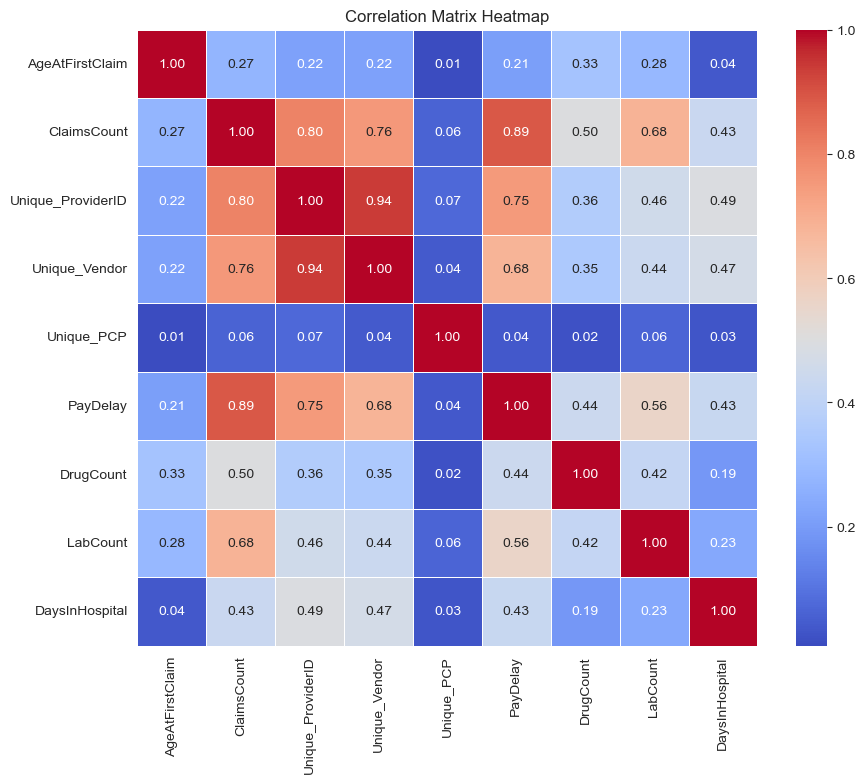

In [8]:
correlation_matrix = df_selected_numerical.corr()

print(correlation_matrix)

plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix Heatmap")
plt.show()

From the above analysis, the conclusion is:
Redundancy characteristics: The high correlation between Unique_ProviderID and Unique_Vendor (0.94) indicates that they are likely to be redundant and one of them should be chosen for modeling. However, both pieces of information are highly correlated to the predicted results, so it is recommended to try to keep one and keep two.

Useful features: ClaimsCount, PayDelay, DrugCount, and LabCount are features that have a moderate correlation with the target variable and can be used to predict length of stay.

Less useful features: Unique_PCP and AgeAtFirstClaim have very low correlation to the results and may contribute little to the model, which can be considered to be removed during feature selection.

Until there is clear evidence that it is not valid for the model, the feature can be retained and its importance can be further evaluated during the model validation process.


## 1.2 Mutual information
Select the feature with high mutual information in the category

#### Sex

In [8]:
X = df[['Male', 'Female', 'Unknown']]  
y = df['DaysInHospital'] 

mi = mutual_info_regression(X, y)

for i, feature in enumerate(X.columns):
    print(f"Mutual Information between {feature} and DaysInHospital: {mi[i]}")

Mutual Information between Male and DaysInHospital: 0.0068920253762305705
Mutual Information between Female and DaysInHospital: 0.0021718411593667497
Mutual Information between Unknown and DaysInHospital: 0.012719185276897527


In [193]:
print("max value =    ", max(mi))
print("average value =",np.mean(mi))

max value =     0.01349665705835168
average value = 0.007679180429492523


Conclusion:
These values are low, indicating a weak association between sex characteristics and the target variable (length of stay).

#### Specialty
（Anesthesiology	Diagnostic Imaging	Emergency	General Practice	Internal	Laboratory	Obstetrics and Gynecology	Other_x	Pathology	Pediatrics	Rehabilitation	Surgery） 12

In [90]:
X = df[['Surgery', 'Internal', 'Laboratory', 'Pediatrics', 'Rehabilitation','Diagnostic Imaging', 'Anesthesiology', 'Emergency', 
        'General Practice', 'Other_x', 'Obstetrics and Gynecology', 'Pathology']] 
y = df['DaysInHospital'] 

mi = mutual_info_regression(X, y)

for i, feature in enumerate(X.columns):
    print(f"Mutual Information between {feature} and DaysInHospital: {mi[i]}")

Mutual Information between Surgery and DaysInHospital: 0.016950884904346708
Mutual Information between Internal and DaysInHospital: 0.0757684593211092
Mutual Information between Laboratory and DaysInHospital: 0.022124267977754464
Mutual Information between Pediatrics and DaysInHospital: 0.001440180246670586
Mutual Information between Rehabilitation and DaysInHospital: 0.0064877842660386875
Mutual Information between Diagnostic Imaging and DaysInHospital: 0.08620858755017835
Mutual Information between Anesthesiology and DaysInHospital: 0.02838039343956833
Mutual Information between Emergency and DaysInHospital: 0.15979291159576636
Mutual Information between General Practice and DaysInHospital: 0.0015025199689402413
Mutual Information between Other_x and DaysInHospital: 0.004302587611761055
Mutual Information between Obstetrics and Gynecology and DaysInHospital: 0.006628562752837297
Mutual Information between Pathology and DaysInHospital: 0.027819515045681698


In [91]:
print("max value =    ", max(mi))
print("average value =",np.mean(mi))

max value =     0.15979291159576636
average value = 0.03645055455672108


#### PlaceSvc
（Ambulance	Home	Independent Lab	Inpatient Hospital	Office	Other_y	Outpatient Hospital	Urgent Care)   8

In [92]:
X = df[['Office', 'Independent Lab', 'Outpatient Hospital', 'Inpatient Hospital',
 'Urgent Care', 'Ambulance', 'Home', 'Other_y']]
y = df['DaysInHospital']

mi = mutual_info_regression(X, y)

for i, feature in enumerate(X.columns):
    print(f"Mutual Information between {feature} and DaysInHospital: {mi[i]}")

Mutual Information between Office and DaysInHospital: 0.02818664217166411
Mutual Information between Independent Lab and DaysInHospital: 0.020655203018782764
Mutual Information between Outpatient Hospital and DaysInHospital: 0.018595533631979855
Mutual Information between Inpatient Hospital and DaysInHospital: 0.1789690617794948
Mutual Information between Urgent Care and DaysInHospital: 0.1709375180984365
Mutual Information between Ambulance and DaysInHospital: 0.0018234504788701145
Mutual Information between Home and DaysInHospital: 0.007000028655061996
Mutual Information between Other_y and DaysInHospital: 0.01732564680221671


In [93]:
print("max value =    ", max(mi))
print("average value =",np.mean(mi))

max value =     0.1789690617794948
average value = 0.055436635579563354


#### PrimaryConditionGroup
(AMI	APPCHOL	ARTHSPIN	CANCRA	CANCRB	CANCRM	CATAST	CHF	COPD	FLaELEC	FXDISLC	GIBLEED	GIOBSENT	GYNEC1	GYNECA	HEART2	HEART4	HEMTOL	HIPFX	INFEC4	LIVERDZ	METAB1	METAB3	MISCHRT	MISCL1	MISCL5	MSC2a3	NEUMENT	ODaBNCA	PERINTL	PERVALV	PNCRDZ	PNEUM	PRGNCY	RENAL1	RENAL2	RENAL3	RESPR4	ROAMI	SEIZURE	SEPSIS	SKNAUT	STROKE	TRAUMA	UTI)  45

In [95]:
X = df[['NEUMENT', 'METAB3', 'FXDISLC', 'TRAUMA', 'RESPR4', 'INFEC4', 'MISCHRT',
 'ARTHSPIN', 'ROAMI', 'HEART2', 'MSC2a3', 'PNEUM', 'MISCL5', 'GIOBSENT', 'RENAL3',
 'GYNEC1', 'AMI', 'UTI', 'COPD', 'GIBLEED', 'HIPFX', 'SKNAUT', 'CANCRB', 'SEIZURE',
 'CHF', 'PRGNCY', 'METAB1', 'HEART4', 'ODaBNCA', 'HEMTOL', 'GYNECA', 'APPCHOL',
 'MISCL1', 'RENAL2', 'STROKE', 'PERVALV', 'CANCRA', 'CATAST', 'FLaELEC',
 'SEPSIS', 'LIVERDZ', 'PNCRDZ', 'RENAL1', 'CANCRM', 'PERINTL']]
y = df['DaysInHospital'] 


mi = mutual_info_regression(X, y)


for i, feature in enumerate(X.columns):
    print(f"Mutual Information between {feature} and DaysInHospital: {mi[i]}")

Mutual Information between NEUMENT and DaysInHospital: 0.0
Mutual Information between METAB3 and DaysInHospital: 0.005539165606968766
Mutual Information between FXDISLC and DaysInHospital: 0.0011826710078297609
Mutual Information between TRAUMA and DaysInHospital: 0.022099523743034588
Mutual Information between RESPR4 and DaysInHospital: 0.004960506363812733
Mutual Information between INFEC4 and DaysInHospital: 0.0012020207467910993
Mutual Information between MISCHRT and DaysInHospital: 0.008368145937244442
Mutual Information between ARTHSPIN and DaysInHospital: 0.009320633693111091
Mutual Information between ROAMI and DaysInHospital: 0.04766459787814892
Mutual Information between HEART2 and DaysInHospital: 0.011369522077272265
Mutual Information between MSC2a3 and DaysInHospital: 0.023108622329273132
Mutual Information between PNEUM and DaysInHospital: 0.008242314970517306
Mutual Information between MISCL5 and DaysInHospital: 0.010592859971283453
Mutual Information between GIOBSENT an

In [96]:
print("max value =    ", max(mi))
print("average value =",np.mean(mi))

max value =     0.04766459787814892
average value = 0.0069409826152287595


#### CharlsonIndex 
（0 1-2	3-4 5+）   4

In [175]:
X = df[['0', '1-2', '3-4', '5+']]
y = df['DaysInHospital']  

mi = mutual_info_regression(X, y)

for i, feature in enumerate(X.columns):
    print(f"Mutual Information between {feature} and DaysInHospital: {mi[i]}")

Mutual Information between 0 and DaysInHospital: 0.04227031092075695
Mutual Information between 1-2 and DaysInHospital: 0.05173333750579623
Mutual Information between 3-4 and DaysInHospital: 0.007717610559609511
Mutual Information between 5+ and DaysInHospital: 0.004667823786779657


In [176]:
print("max value =    ", max(mi))
print("average value =",np.mean(mi))

max value =     0.05173333750579623
average value = 0.026597270693235586


#### ProcedureGroup  
(ANES	EM	MED	PL	RAD	SAS	SCS	SDS	SEOA	SGS	SIS	SMCD	SMS	SNS	SO	SRS	SUS	)  17

In [99]:
X = df[['MED', 'EM', 'SCS', 'RAD', 'ANES', 'SDS', 'PL', 'SIS', 'SMS', 'SGS', 'SEOA', 'SNS',
 'SAS', 'SRS', 'SUS', 'SO', 'SMCD']]
y = df['DaysInHospital']  

mi = mutual_info_regression(X, y)

for i, feature in enumerate(X.columns):
    print(f"Mutual Information between {feature} and DaysInHospital: {mi[i]}")

Mutual Information between MED and DaysInHospital: 0.04416245641676131
Mutual Information between EM and DaysInHospital: 0.08212474837289196
Mutual Information between SCS and DaysInHospital: 0.01613419243691183
Mutual Information between RAD and DaysInHospital: 0.08081971130383181
Mutual Information between ANES and DaysInHospital: 0.03911424263009433
Mutual Information between SDS and DaysInHospital: 0.16446885989789983
Mutual Information between PL and DaysInHospital: 0.01656907235795213
Mutual Information between SIS and DaysInHospital: 0.03474062394599464
Mutual Information between SMS and DaysInHospital: 0.027131230849965604
Mutual Information between SGS and DaysInHospital: 0.0036202322489051753
Mutual Information between SEOA and DaysInHospital: 0.001923040906822493
Mutual Information between SNS and DaysInHospital: 0.0014486238274376007
Mutual Information between SAS and DaysInHospital: 0.0006588887614062955
Mutual Information between SRS and DaysInHospital: 0.0
Mutual Informa

In [100]:
print("max value =    ", max(mi))
print("average value =",np.mean(mi))

max value =     0.16446885989789983
average value = 0.0313617765821696


#### DSFS 
(0- 1 month	1- 2 months	10-11 months	11-12 months	2- 3 months	3- 4 months	4- 5 months	5- 6 months	6- 7 months	7- 8 months	8- 9 months	9-10 months	)  12

In [101]:
X = df[['0- 1 month', '1- 2 months', '2- 3 months', '3- 4 months', '4- 5 months', '5- 6 months', '6- 7 months', '7- 8 months', '8- 9 months',
 '9-10 months', '10-11 months', '11-12 months']]
y = df['DaysInHospital'] 

mi = mutual_info_regression(X, y)

for i, feature in enumerate(X.columns):
    print(f"Mutual Information between {feature} and DaysInHospital: {mi[i]}")

Mutual Information between 0- 1 month and DaysInHospital: 0.029064820060495045
Mutual Information between 1- 2 months and DaysInHospital: 0.02189049162579959
Mutual Information between 2- 3 months and DaysInHospital: 0.028124372925828922
Mutual Information between 3- 4 months and DaysInHospital: 0.01746435486531972
Mutual Information between 4- 5 months and DaysInHospital: 0.018711905120871286
Mutual Information between 5- 6 months and DaysInHospital: 0.024998037293828546
Mutual Information between 6- 7 months and DaysInHospital: 0.018197095574906896
Mutual Information between 7- 8 months and DaysInHospital: 0.022258690955396787
Mutual Information between 8- 9 months and DaysInHospital: 0.019622822235056958
Mutual Information between 9-10 months and DaysInHospital: 0.020452330859688672
Mutual Information between 10-11 months and DaysInHospital: 0.013018115335273528
Mutual Information between 11-12 months and DaysInHospital: 0.011082343626211966


In [102]:
print("max value =    ", max(mi))
print("average value =",np.mean(mi))

max value =     0.029064820060495045
average value = 0.020407115039889828


### Conclusion
useful feature：ProcedureGroup PlaceSvc Specialty


## 1.3 Variance Threshold, Another dimensionality reduction method applied to categorical data
have not use

In [116]:
X = df[['Male', 'Female', 'Unknown']]  
selector = VarianceThreshold(threshold=0.01)

df_selected = selector.fit_transform(X)

print(df_selected)

selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features)

[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]
Selected features: Index(['Male', 'Female', 'Unknown'], dtype='object')


In [117]:
X = df[['Surgery', 'Internal', 'Laboratory', 'Pediatrics', 'Rehabilitation','Diagnostic Imaging', 'Anesthesiology', 'Emergency', 
        'General Practice', 'Other_x', 'Obstetrics and Gynecology', 'Pathology']] 
selector = VarianceThreshold(threshold=0.01)

df_selected = selector.fit_transform(X)

print(df_selected)

selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features)

[[ 0.  1.  1. ...  4.  0.  0.]
 [ 0.  1.  2. ...  0.  0.  0.]
 [ 1.  1.  2. ...  0.  0.  0.]
 ...
 [ 0.  0.  2. ...  0.  0.  0.]
 [ 0.  6.  0. ...  0.  0.  0.]
 [ 0. 11.  2. ...  0.  0.  0.]]
Selected features: Index(['Surgery', 'Internal', 'Laboratory', 'Pediatrics', 'Rehabilitation',
       'Diagnostic Imaging', 'Anesthesiology', 'Emergency', 'General Practice',
       'Other_x', 'Obstetrics and Gynecology', 'Pathology'],
      dtype='object')


In [118]:
X = df[['Office', 'Independent Lab', 'Outpatient Hospital', 'Inpatient Hospital',
 'Urgent Care', 'Ambulance', 'Home', 'Other_y']]
selector = VarianceThreshold(threshold=0.01)

df_selected = selector.fit_transform(X)

print(df_selected)

selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features)

[[ 5.  1.  0. ...  0.  0.  0.]
 [ 3.  2.  0. ...  0.  0.  0.]
 [ 4.  2.  0. ...  0.  0.  0.]
 ...
 [ 1.  2.  0. ...  0.  0.  0.]
 [ 6.  0.  0. ...  0.  0.  0.]
 [13.  2.  0. ...  0.  0.  0.]]
Selected features: Index(['Office', 'Independent Lab', 'Outpatient Hospital',
       'Inpatient Hospital', 'Urgent Care', 'Ambulance', 'Home', 'Other_y'],
      dtype='object')


In [119]:
X = df[['NEUMENT', 'METAB3', 'FXDISLC', 'TRAUMA', 'RESPR4', 'INFEC4', 'MISCHRT',
 'ARTHSPIN', 'ROAMI', 'HEART2', 'MSC2a3', 'PNEUM', 'MISCL5', 'GIOBSENT', 'RENAL3',
 'GYNEC1', 'AMI', 'UTI', 'COPD', 'GIBLEED', 'HIPFX', 'SKNAUT', 'CANCRB', 'SEIZURE',
 'CHF', 'PRGNCY', 'METAB1', 'HEART4', 'ODaBNCA', 'HEMTOL', 'GYNECA', 'APPCHOL',
 'MISCL1', 'RENAL2', 'STROKE', 'PERVALV', 'CANCRA', 'CATAST', 'FLaELEC',
 'SEPSIS', 'LIVERDZ', 'PNCRDZ', 'RENAL1', 'CANCRM', 'PERINTL']]
selector = VarianceThreshold(threshold=0.01)

df_selected = selector.fit_transform(X)

print(df_selected)

selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 5. ... 0. 0. 0.]
 ...
 [3. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Selected features: Index(['NEUMENT', 'METAB3', 'FXDISLC', 'TRAUMA', 'RESPR4', 'INFEC4', 'MISCHRT',
       'ARTHSPIN', 'ROAMI', 'HEART2', 'MSC2a3', 'PNEUM', 'MISCL5', 'GIOBSENT',
       'RENAL3', 'GYNEC1', 'AMI', 'UTI', 'COPD', 'GIBLEED', 'HIPFX', 'SKNAUT',
       'CANCRB', 'SEIZURE', 'CHF', 'PRGNCY', 'METAB1', 'HEART4', 'ODaBNCA',
       'HEMTOL', 'GYNECA', 'APPCHOL', 'MISCL1', 'RENAL2', 'STROKE', 'PERVALV',
       'CANCRA', 'CATAST', 'FLaELEC', 'SEPSIS', 'LIVERDZ', 'PNCRDZ', 'RENAL1',
       'CANCRM', 'PERINTL'],
      dtype='object')


drop 'PERVALV'

In [120]:
X = df[['0', '1-2', '3-4', '5+']]
selector = VarianceThreshold(threshold=0.01)

df_selected = selector.fit_transform(X)

print(df_selected)

selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features)

[[ 6.  0.  0.  0.]
 [ 5.  0.  0.  0.]
 [11.  0.  0.  0.]
 ...
 [ 4.  0.  0.  0.]
 [ 3.  3.  0.  0.]
 [15.  0.  0.  0.]]
Selected features: Index(['0', '1-2', '3-4', '5+'], dtype='object')


In [121]:
X = df[['MED', 'EM', 'SCS', 'RAD', 'ANES', 'SDS', 'PL', 'SIS', 'SMS', 'SGS', 'SEOA', 'SNS',
 'SAS', 'SRS', 'SUS', 'SO', 'SMCD']]
selector = VarianceThreshold(threshold=0.01)

df_selected = selector.fit_transform(X)

print(df_selected)

selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features)

[[ 4.  1.  0. ...  0.  0.  0.]
 [ 0.  2.  1. ...  0.  0.  0.]
 [ 0.  3.  1. ...  0.  0.  0.]
 ...
 [ 1.  1.  1. ...  0.  0.  0.]
 [ 0.  4.  0. ...  0.  0.  0.]
 [11.  2.  1. ...  0.  0.  0.]]
Selected features: Index(['MED', 'EM', 'SCS', 'RAD', 'ANES', 'SDS', 'PL', 'SIS', 'SMS', 'SGS',
       'SEOA', 'SNS', 'SAS', 'SRS', 'SUS', 'SMCD'],
      dtype='object')


drop 'SO'

In [122]:
X = df[['0- 1 month', '1- 2 months', '2- 3 months', '3- 4 months', '4- 5 months', '5- 6 months', '6- 7 months', '7- 8 months', '8- 9 months',
 '9-10 months', '10-11 months', '11-12 months']]
selector = VarianceThreshold(threshold=0.01)

df_selected = selector.fit_transform(X)

print(df_selected)

selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features)

[[ 2.  0.  0. ...  1.  0.  0.]
 [ 1.  4.  0. ...  0.  0.  0.]
 [ 7.  3.  1. ...  0.  0.  0.]
 ...
 [ 1.  2.  0. ...  0.  0.  0.]
 [ 5.  0.  1. ...  0.  0.  0.]
 [10.  2.  1. ...  0.  0.  0.]]
Selected features: Index(['0- 1 month', '1- 2 months', '2- 3 months', '3- 4 months',
       '4- 5 months', '5- 6 months', '6- 7 months', '7- 8 months',
       '8- 9 months', '9-10 months', '10-11 months', '11-12 months'],
      dtype='object')


### Conclusion:
Try 40 features by filter method.

From numerical feature, select 'ClaimsCount', 'PayDelay', 'Unique_ProviderID' 3 features

From categorical feature, select 'ProcedureGroup', 'PlaceSvc' ,'Specialty' by onehot encoded 37 features

# 2 Wrap method

## 2.1 RFE
From the 110 features, select the features that perform well and as few as possible in the linear regression model.

In [9]:
X = df.drop(columns=['DaysInHospital']) 
y = df['DaysInHospital']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

for i in range(1,X.shape[1]):

    rfe = RFE(model, n_features_to_select=i)

    rfe = rfe.fit(X_train, y_train)

    selected_features = X.columns[rfe.support_]

    X_train_rfe = rfe.transform(X_train)
    X_test_rfe = rfe.transform(X_test)

    model.fit(X_train_rfe, y_train)
    y_pred = model.predict(X_test_rfe)

    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error: ", mse)


Mean Squared Error:  1.851773462259123
Mean Squared Error:  1.8491948915973249
Mean Squared Error:  1.8495461175144554
Mean Squared Error:  1.845674498825455
Mean Squared Error:  1.8457160841014029
Mean Squared Error:  1.8466940153596147
Mean Squared Error:  0.945137748731179
Mean Squared Error:  0.9418645303662054
Mean Squared Error:  0.9378271844058808
Mean Squared Error:  0.8721331064985578
Mean Squared Error:  0.8725381327431944
Mean Squared Error:  0.8678035358666324
Mean Squared Error:  0.8560165244301841
Mean Squared Error:  0.8550162680688317
Mean Squared Error:  0.8556516799871593
Mean Squared Error:  0.8559008962154849
Mean Squared Error:  0.8515594710264671
Mean Squared Error:  0.85213422300084
Mean Squared Error:  0.851655293254639
Mean Squared Error:  0.8505684537698363
Mean Squared Error:  0.8502892673392545
Mean Squared Error:  0.8524892292769651
Mean Squared Error:  0.8517339003854789
Mean Squared Error:  0.8508732011167865
Mean Squared Error:  0.8509856044690957
Mean S

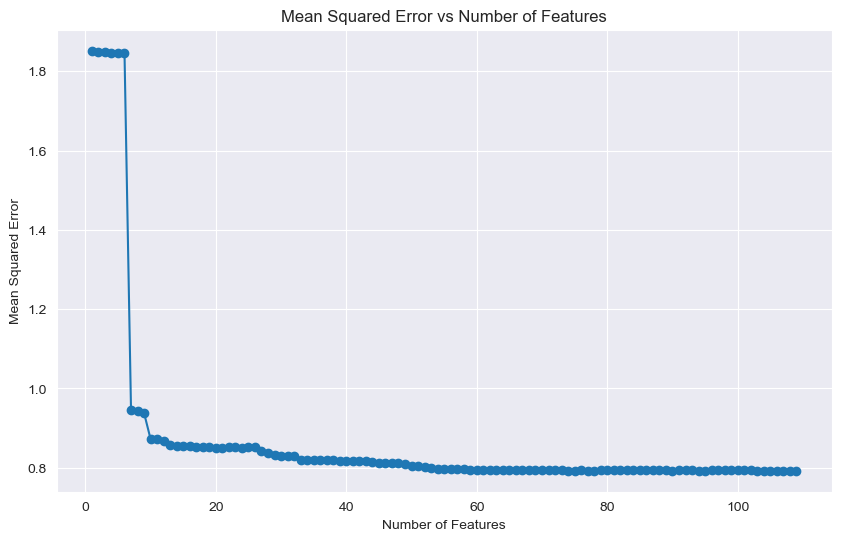

In [16]:
# MSE values from the previous data
mse_values = [
    1.851773462259123, 1.8491948915973249, 1.8495461175144554, 1.845674498825455,
    1.8457160841014029, 1.8466940153596147, 0.945137748731179, 0.9418645303662054,
    0.9378271844058808, 0.8721331064985578, 0.8725381327431944, 0.8678035358666324,
    0.8560165244301841, 0.8550162680688317, 0.8556516799871593, 0.8559008962154849,
    0.8515594710264671, 0.85213422300084, 0.851655293254639, 0.8505684537698363,
    0.8502892673392545, 0.8524892292769651, 0.8517339003854789, 0.8508732011167865,
    0.8509856044690957, 0.8510537076911461, 0.8433956862957328, 0.8361626423256477,
    0.832921751520899, 0.8296208576733666, 0.830173397007635, 0.8285240605941248,
    0.818564041032149, 0.818687146028591, 0.8182598127669023, 0.8182442582321865,
    0.818567132286014, 0.8182234643492587, 0.8166684119478614, 0.8168099907350959,
    0.8169609841352568, 0.816796707963825, 0.8168618643649094, 0.8144032448121841,
    0.8126844390944868, 0.8124366551462795, 0.8111891781691151, 0.8116719969147278,
    0.8102867449885275, 0.8040615476447383, 0.8039366125441777, 0.8030396130456675,
    0.798517600070573, 0.7977781215152109, 0.7976037622837296, 0.7976029921521811,
    0.797535999018408, 0.7973741645828517, 0.7942189769089022, 0.7939748944664954,
    0.7942604996109176, 0.7940450792925948, 0.7936016049413915, 0.793622307289385,
    0.7948112594528464, 0.7952434895886829, 0.794624239211955, 0.7944925685548279,
    0.793013932283178, 0.7932166290366395, 0.793045628038708, 0.7930906781049977,
    0.7931725397436062, 0.7927093660982795, 0.7929213717187645, 0.7929963488757136,
    0.7928117219217949, 0.7927072678976917, 0.7932906388243728, 0.7930857549534249,
    0.7939496388992257, 0.7940473682111963, 0.7938783912063984, 0.7934536216118859,
    0.7933027389331649, 0.7932836477657047, 0.7932438702956692, 0.7932657578647486,
    0.793279769654285, 0.792922615462414, 0.7930524295143059, 0.7931806313023357,
    0.7931866055668573, 0.7929107409811723, 0.792913691434882, 0.7930380582415271,
    0.7930420973314315, 0.7931114689215552, 0.7930988065562066, 0.7931567130816375,
    0.793265904788279, 0.7932218663319814, 0.7927795643517279, 0.7927931907142696,
    0.7927803677665218, 0.7925395005292211, 0.7925413187730812, 0.792541741213345,
    0.7923942651273925
]

# X axis representing the number of features
x = np.arange(1, len(mse_values) + 1)

# Plotting the line graph
plt.figure(figsize=(10,6))
plt.plot(x, mse_values, marker='o')
plt.title("Mean Squared Error vs Number of Features")
plt.xlabel("Number of Features")
plt.ylabel("Mean Squared Error")
plt.grid(True)

# Display the plot
plt.show()

### Conclusion
try 33 features by wrap method.
